In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
from src.data.compute_zscores import compute_fundamental_zscores
from src.data.load_data import load_all_fundamentals, get_all_returns_fundamental, adapt_benchmark
from src.signals.fundamental.dataset_regression_alpha_result import plot_analyse_alpha_target,create_fundamental_dataset, train_ridge_on_fundamental_alpha
from src.signals.fundamental.long_short_strategy import plot_long_short_quantile_strategy, backtest_long_short_neutral
from src.evaluation.strategy_indicators import evaluate_long_short_results
dfs = load_all_fundamentals()
df_z = compute_fundamental_zscores(dfs)
df_returns = get_all_returns_fundamental(df_z)

YF.download() has changed argument auto_adjust default to True


In [3]:
dataset = create_fundamental_dataset(df_z, df_returns)
dataset.head(10)

,date,ticker,FCF_Yield,ROIC,Gearing,Revenue_Growth_YOY,target
0,2021-12-31,AIR.PA,0.135395,-0.068487,-0.508354,NaN,-0.138048
1,2022-12-31,AIR.PA,0.076803,0.475111,-0.555737,0.148230,-0.051871
2,2023-12-31,AIR.PA,0.067572,0.154229,-0.610542,0.068026,0.040364
3,2024-03-31,AIR.PA,0.120421,0.061301,-0.538770,NaN,-0.242260
4,2024-06-30,AIR.PA,0.412689,-0.398473,-0.455341,NaN,-0.080132
5,2024-09-30,AIR.PA,-0.190654,0.278698,-0.502764,NaN,0.138835
6,2024-12-31,AIR.PA,0.278571,-0.100859,-0.426841,-0.500589,-0.046709
7,2021-12-31,SAF.PA,-0.024563,-0.514050,-0.522737,NaN,-0.048815
8,2022-12-31,SAF.PA,-0.056523,-1.767137,-0.473522,1.921703,0.048350
9,2023-12-31,SAF.PA,0.125535,1.566506,-0.558391,1.468916,0.069523


In [4]:
weights, model, scaler, df_clean = train_ridge_on_fundamental_alpha(dataset)
df_clean.head(5)

,date,ticker,FCF_Yield,ROIC,Gearing,Revenue_Growth_YOY,target,alpha
1,2022-12-31,AIR.PA,0.076803,0.475111,-0.555737,0.148230,-0.051871,0.064312
2,2023-12-31,AIR.PA,0.067572,0.154229,-0.610542,0.068026,0.040364,0.088178
6,2024-12-31,AIR.PA,0.278571,-0.100859,-0.426841,-0.500589,-0.046709,0.061150
8,2022-12-31,SAF.PA,-0.056523,-1.767137,-0.473522,1.921703,0.048350,0.238851
9,2023-12-31,SAF.PA,0.125535,1.566506,-0.558391,1.468916,0.069523,0.048305


Linear regression:
  slope               = 1.2218
  intercept           = -0.0010
  R² (from linregress)= 0.2536
  Corr (Pearson)      = 0.5036
  p-value regression  = 0.0003601
  p-value Pearson     = 0.0003601
  std error of slope  = 0.316


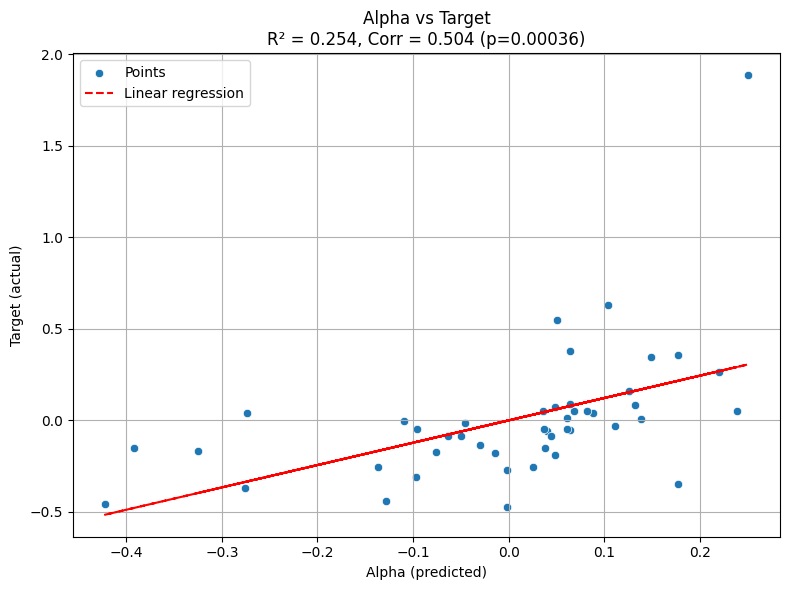

{'slope': np.float64(1.2217765516839587),
 'intercept': np.float64(-0.0010118063595387066),
 'r_squared': np.float64(0.2536109728426498),
 'correlation': np.float64(0.5035980270440401),
 'p_value_linreg': np.float64(0.0003601227677941778),
 'p_value_corr': np.float64(0.00036012276779417795),
 'std_error': np.float64(0.3159832420493649)}

In [5]:
plot_analyse_alpha_target(df_clean)

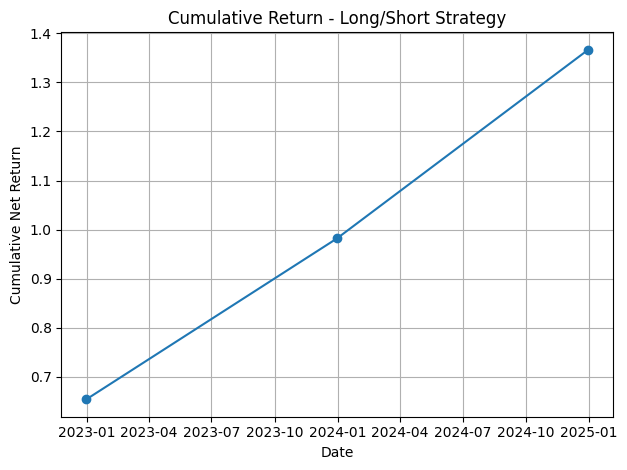

        date  long_return  short_return  long_count  short_count  net_return
0 2022-12-31     0.382727     -0.271525           5            5    0.654252
1 2023-12-31     0.147765     -0.179943           5            5    0.327708
2 2024-12-31     0.281232     -0.103217           3            3    0.384448


In [6]:
perf_df = backtest_long_short_neutral(df_clean)
plot_long_short_quantile_strategy(perf_df)

In [7]:
benchmark_df = adapt_benchmark(perf_df)
benchmark_df

c:\Users\ALrig\PROJET-QUANT\alpha-research-equities\src\data\load_data.py:49: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = price_df.pct_change().dropna()


,date,benchmark_return
0,2022-12-31,0.202754
1,2023-12-31,0.314599
2,2024-12-31,0.336376


In [8]:
evaluate_long_short_results(perf_df, benchmark_df)

(        date  long_return  short_return  long_count  short_count  net_return  \
 0 2023-12-31     0.147765     -0.179943           5            5    0.327708   
 1 2024-12-31     0.281232     -0.103217           3            3    0.384448   
 
    benchmark_return  excess_return  
 0          0.314599       0.013109  
 1          0.336376       0.048072  ,
 {'Annual Return': np.float64(0.3557814024227366),
  'Information Ratio': np.float64(1.237341763347348),
  'Max Drawdown': np.float64(0.0),
  'Alpha': np.float64(-0.4919878441693357),
  'Beta': np.float64(2.6055254267648142),
  'Correlation': np.float64(1.0),
  'R²': np.float64(1.0)},
         date  long_return  short_return  long_count  short_count  net_return  \
 1 2024-12-31     0.281232     -0.103217           3            3    0.384448   
 0 2023-12-31     0.147765     -0.179943           5            5    0.327708   
 
    benchmark_return  excess_return  
 1          0.336376       0.048072  
 0          0.314599       0.0131